# Breast Cancer classification using Logistic Regression & KNeighbors Classification & Decision Tree & Random Forest & SVM.

* Load Libraries.

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
sns.set_style('darkgrid')
sns.set_palette('viridis')

* Load dataset.

In [107]:
cancer_df = pd.read_csv('cancer.csv')

In [108]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


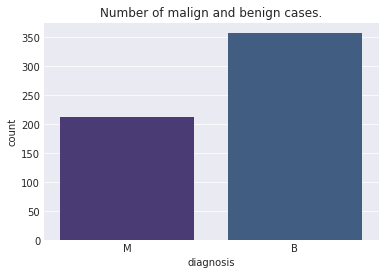

In [109]:
sns.countplot(cancer_df['diagnosis'],data=cancer_df)
plt.title('Number of malign and benign cases.')
plt.show()

In [110]:
def m_b(text):
    if text == 'M':
        return 1
    else:
        return 0

In [111]:
cancer_df = cancer_df.drop(cancer_df.columns[-1], axis=1)

In [112]:
cancer_df['M'] = cancer_df.diagnosis.apply(m_b)

In [113]:
X = cancer_df[cancer_df.columns[2:-1]]
y = cancer_df['M']

# Logistic Regression.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

In [116]:
logmodel = LogisticRegression()

In [117]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
pred = logmodel.predict(X_test)

In [119]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[98  2]
 [ 7 64]]


             precision    recall  f1-score   support

          0       0.93      0.98      0.96       100
          1       0.97      0.90      0.93        71

avg / total       0.95      0.95      0.95       171



# KNeighbors Classification.

In [120]:
scaler = StandardScaler()

In [121]:
features = scaler.fit_transform(cancer_df[cancer_df.columns[2:-1]])

In [122]:
cancer_feats = pd.DataFrame(data=features, columns=cancer_df.columns[2:-1])

In [123]:
X = cancer_feats
y = cancer_df['diagnosis']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

In [125]:
knn = KNeighborsClassifier(n_neighbors=1)

In [126]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [127]:
pred = knn.predict(X_test)

In [128]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

Confusion Matrix:
[[98  2]
 [ 9 62]]


Classification Report:
             precision    recall  f1-score   support

          B       0.92      0.98      0.95       100
          M       0.97      0.87      0.92        71

avg / total       0.94      0.94      0.94       171



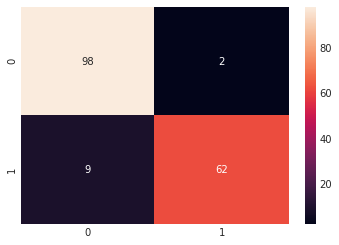

In [129]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [130]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

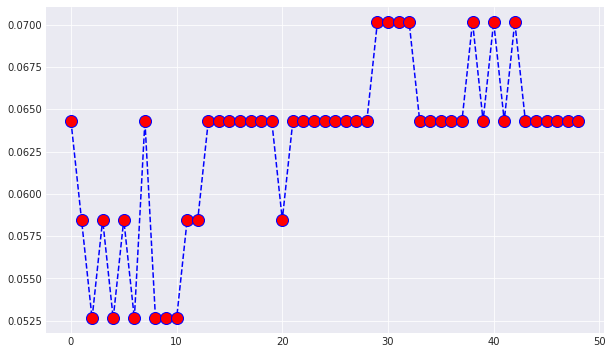

In [131]:
fig = plt.figure(figsize=(10,6))

plt.plot(error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)

plt.show()

### Confusion Matrix and Classification report for best K.

In [132]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K =',error_rate.index(min(error_rate)))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K = 2


Confusion Matrix:
[[100   0]
 [  9  62]]


Classification Report:
             precision    recall  f1-score   support

          B       0.92      1.00      0.96       100
          M       1.00      0.87      0.93        71

avg / total       0.95      0.95      0.95       171



# Decision Tree.

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dtree = DecisionTreeClassifier()

In [135]:
X = cancer_df[cancer_df.columns[2:-1]]
y = cancer_df['M']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

In [137]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
pred = dtree.predict(X_test)

In [139]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

Confusion Matrix:
[[96  4]
 [11 60]]


Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       100
          1       0.94      0.85      0.89        71

avg / total       0.91      0.91      0.91       171



# Random Forest.

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(n_estimators=600)

In [142]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
pred = rf.predict(X_test)

In [144]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

Confusion Matrix:
[[100   0]
 [  6  65]]


Classification Report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       100
          1       1.00      0.92      0.96        71

avg / total       0.97      0.96      0.96       171



# SVM.

In [145]:
from sklearn.svm import SVC

In [146]:
svc = SVC()

In [147]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
pred = svc.predict(X_test)

In [149]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

Confusion Matrix:
[[100   0]
 [ 71   0]]


Classification Report:
             precision    recall  f1-score   support

          0       0.58      1.00      0.74       100
          1       0.00      0.00      0.00        71

avg / total       0.34      0.58      0.43       171



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Grid Search.

In [150]:
from sklearn.grid_search import GridSearchCV

In [151]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [152]:
grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [153]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.646617 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.646617 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.643939 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.646617 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.646617 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.643939 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.643939 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.646617 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.646617 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.643939 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.646617 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.646617 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.643939 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=5)

In [154]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [155]:
grid_pred = grid.predict(X_test)

In [156]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, grid_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,grid_pred))

Confusion Matrix:
[[93  7]
 [ 6 65]]


Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.93      0.93       100
          1       0.90      0.92      0.91        71

avg / total       0.92      0.92      0.92       171



## Overall the Random Forest Algorithm usually performed better than the others.